In [1]:
#Importation packages nécessaires
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer 
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Telechargement CIF et création structure cristal
m = MPRester("hzUX5FwAxRKy1v6G")
structure = m.get_structure_by_material_id("mp-10778")
CifWriter(structure,0.1, write_magmoms=False).write_file("mp-10778.cif")

This database version has changed from the database last accessed (2021_02_08).
Please see release notes on materialsproject.org for information about what has changed.


In [3]:
#Structure de bande du cristal
bande = m.get_bandstructure_by_material_id("mp-10778") 

In [4]:
#Objet BSPlotter pour le graphe et éléments de la structure de bande
BSP = BSPlotter(bande)
elements = BSP.bs_plot_data()

# 1) Bande interdite

Caractéristique de la bande interdite: {'direct': False, 'energy': 1.8997, 'transition': '\\Gamma-F'}


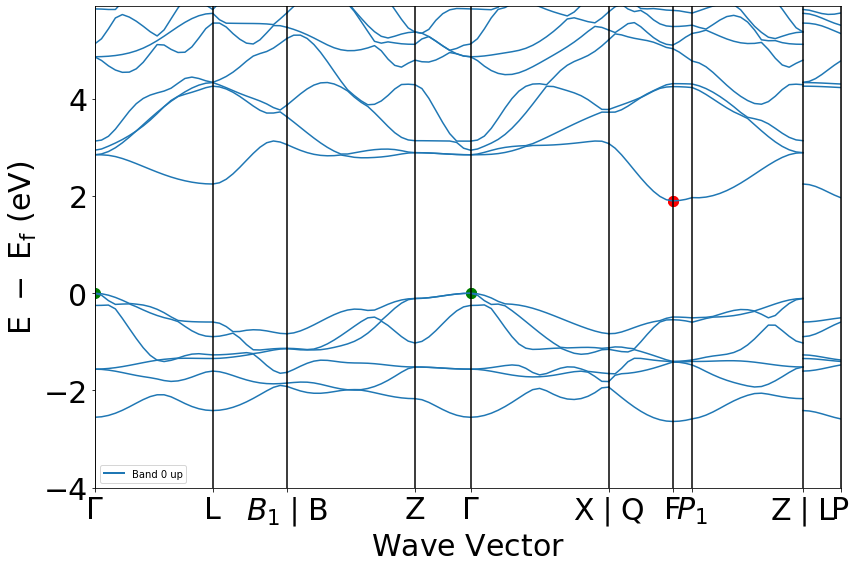

In [5]:
#Bande interdite
BandeInterdite = bande.get_band_gap()
BSP.get_plot(vbm_cbm_marker=True)
print("Caractéristique de la bande interdite: " + str(BandeInterdite))

Sur le graphe l'on peut appercevoir un point rouge et un point vert correspondant aux frontiéres de la bande interdite. La bande interdite est indirecte car le minimum de la première bande de conduction ($\Gamma$) n'est pas aligné avec le maximum de la dernière bande de valence (F). Pour faire passer un électron de la bande de valence à la bande de conduction il faut lui donner une énergie supérieure à la bande interdite.

La bande interdite a comme valeur 1.8997 eV ($\Gamma$ à F).

# 2) Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion

Pour trouver les directions dans la dernière bande de valence et dans la première bande de conduction qui représentent le plus et le moins de dispersion, nous allons calculer la valeur absolue la plus et la moins élevée de la pente dans chaque branche définie par les axes verticaux.

In [6]:
vbm = bande.get_vbm()
cbm = bande.get_cbm()
print("Index vbm :" , vbm['band_index'])
print("Index cbm :" , cbm['band_index'])

Index vbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]})
Index cbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})


La bande 16 est la bande contenant l'énergie la plus basse de la bande de conduction.
Les bandes 14 et 15 sont les bandes contenant l'énergie la plus haute de la bande de valence. 

In [7]:
Distance = elements.get('ticks').get('distance')
Distance = np.array([Distance[0],Distance[1],Distance[3],Distance[4],Distance[6],Distance[8],Distance[9],Distance[11],Distance[13],Distance[14]])
energy = elements.get('energy')
dx = np.zeros(9)
dyconduction = np.zeros(9)
dyvalence = np.zeros(9)
mconduction = np.zeros(9)
mvalence = np.zeros(9)

for u in range(9):
    dx[u] = Distance[u+1] - Distance[u]
    dyvalence[u] = energy.get('1')[u][15][-1] - energy.get('1')[u][15][0]
    dyconduction[u] = energy.get('1')[u][16][-1] - energy.get('1')[u][16][0]
for u in range (9):
    mconduction[u] = dyconduction[u]/dx[u]
    mvalence[u] = dyvalence[u]/dx[u]

In [8]:
MaxValence = np.max(abs(mvalence))
MaxConduction = np.max(abs(mconduction))
MinValence = np.min(abs(mvalence))
MinConduction = np.min(abs(mconduction))

print('Tableau contenant les différentes valeurs des pentes sur la dernière bande de valence: \n')
print(mvalence)
print('\nLa plus grande dispersion pour la dernière bande de valence a une valeur de '+ str(MaxValence)+' et a lieu sur: Gamma-X|Q.',"\n")
print('La plus faible dispersion pour la dernière bande de valence a une valeur de '+ str(MinValence)+' et a lieu sur: F-P1.',"\n")
print('Tableau contenant les différentes valeurs des pentes sur la première bande de conduction \n')
print(mconduction)
print('\nLa plus grande dispersion pour la première bande de conduction a une valeur de '+ str(MaxConduction)+' et a lieu sur: X|Q-F.',"\n")
print('La plus faible dispersion pour la première bande de conduction  a une valeur de '+ str(MinConduction)+' et a lieu sur: Z-Gamma.',"\n")

Tableau contenant les différentes valeurs des pentes sur la dernière bande de valence: 

[-0.71202218 -0.4619547   0.80532665  0.27608521 -0.85557047  0.76170248
 -0.12645631  0.51052184  0.32569189]

La plus grande dispersion pour la dernière bande de valence a une valeur de 0.8555704738794939 et a lieu sur: Gamma-X|Q. 

La plus faible dispersion pour la dernière bande de valence a une valeur de 0.1264563141411393 et a lieu sur: F-P1. 

Tableau contenant les différentes valeurs des pentes sur la première bande de conduction 

[-0.72284136  1.55210651 -0.18404295 -0.11068972  0.23833822 -2.61944843
  0.48828218  1.18510795 -1.0603922 ]

La plus grande dispersion pour la première bande de conduction a une valeur de 2.6194484327410894 et a lieu sur: X|Q-F. 

La plus faible dispersion pour la première bande de conduction  a une valeur de 0.11068971939761811 et a lieu sur: Z-Gamma. 



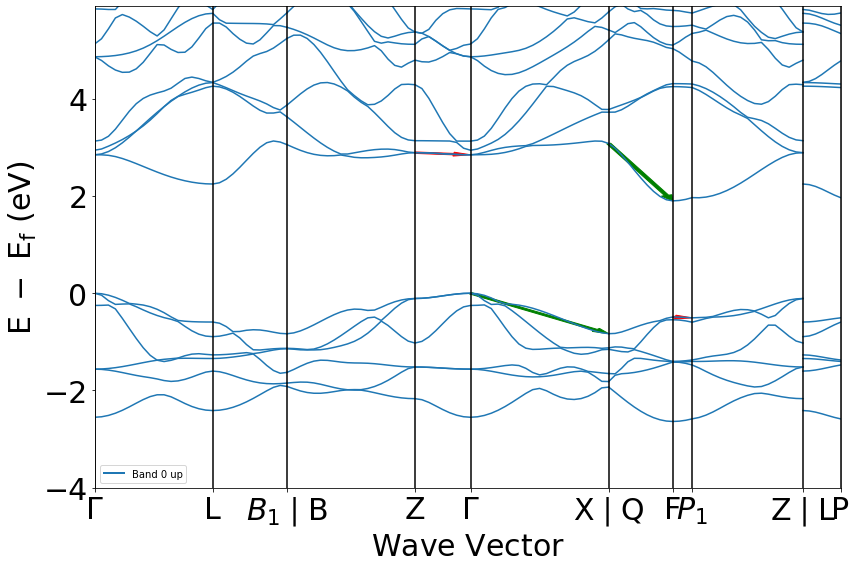

In [9]:
BSP.get_plot()
plt.arrow(Distance[6], (energy.get('1')[6][15])[0], dx[6], dyvalence[6], color = 'r', head_width = 0.08,length_includes_head=True,width= 0.03)
plt.arrow(Distance[4], (energy.get('1')[4][15])[0], dx[4], dyvalence[4], color = 'g', head_width = 0.08,length_includes_head=True,width= 0.03)
plt.arrow(Distance[5], (energy.get('1')[5][16])[0], dx[5], dyconduction[5], color = 'g', head_width = 0.08,length_includes_head=True,width= 0.03)
plt.arrow(Distance[3], (energy.get('1')[3][16])[0], dx[3], dyconduction[3], color = 'r', head_width = 0.08,length_includes_head=True,width= 0.03)
plt.show()

Dans la première bande de conduction on peut observer la flèche verte qui indique la direction dans laquelle cette bande a le plus de dispersion, $X|Q - F$, et en rouge la direction avec le moins de dispersion, $Z - \Gamma$.<br />
Dans la derniière bande de valence on peut observer la flèche verte qui indique la direction dans laquelle cette bande a le plus de dispersion, $\Gamma - X|Q$, et en rouge la direction avec le moins de dispersion, $F - P_1$. 

# 3) Masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

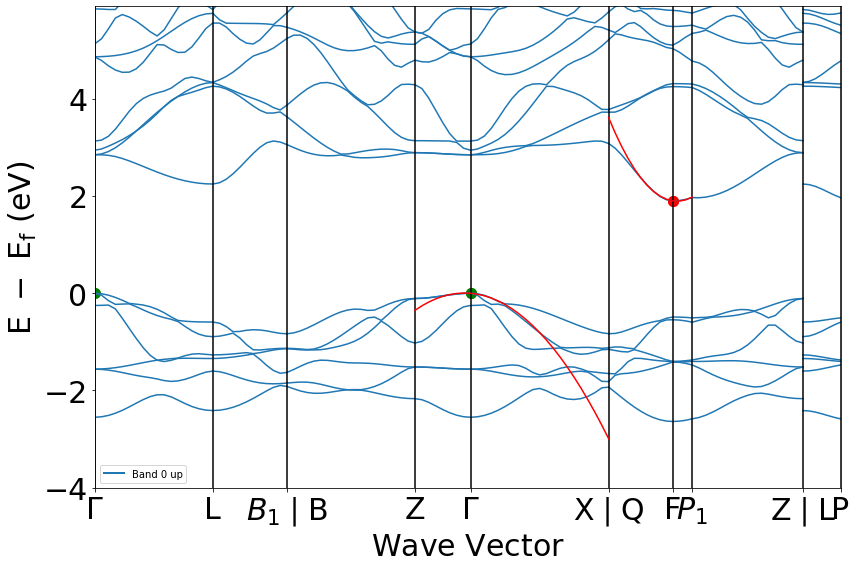

In [12]:
# definition des différents point qui seront utilisés :
position = elements.get('distances')
ZG = position[3] 
GX = position[4] 
QF = position[5] 
FP1 = position[6] 

# ordonnéees deux points sur la bande de valence
ZGyV = energy.get('1')[3][15] 
GXyV = energy.get('1')[4][15] 


# ordonnéees deux points sur la bande de conduction
QFyC = energy.get('1')[5][16] 
FP1yC = energy.get('1')[6][16]


# Je prend les 5 points à droite et à gauche des points choisi précédemment
ValenceX = np.append(ZG[-5:],GX[0:5]) 
ConductionX = np.append(QF[-5:],FP1[0:5]) 
ValenceY = np.append(ZGyV[-5:],GXyV[0:5]) 
ConductionY = np.append(QFyC[-5:],FP1yC[0:5]) 


# Polyfit parabolique (2) de ses points 
Val = np.polyfit(ValenceX,ValenceY,2) 
Cond = np.polyfit(ConductionX,ConductionY,2) 
mValence = Val[0]
mConduction = Cond[0]


# Je prend tout les points à droite et à gauche contenu dans les tableaus des points choisi précédemment
ValX = np.append(ZG,GX) 
CondX = np.append(QF,FP1) 


# On trace les deux paraboles
BSP.get_plot(vbm_cbm_marker=True) 
plt.plot(ValX,Val[0]*ValX**2+Val[1]*ValX+Val[2],color='red') 
plt.plot(CondX,Cond[0]*CondX**2+Cond[1]*CondX+Cond[2],color='red') 
plt.show()

Masse effective:

Formule: <br />
$m^* = \frac{ \hbar^2}{ \left( \frac{\partial ^2 \epsilon}{\partial k^2} \right)}$

La dérivée seconde de la parabole correspond à une constante, deux fois mValence pour la parabole du point au sommet de la bande de valence et deux fois mConduction pour la parabole passant par le point à la base de la bande de conduction.

In [13]:
eV = 1.602176634*(10**-19)
hb = (1.054571817*(10**-34))
print('Masse effective convertie directement en [kg]:')
print('Masse effective au sommet de la bande de valence: m* = ',abs((hb**2)/(2*mValence*((10**-10)**2)*eV)),'[kg]')
print('En bas de la bande de conduction: m* = ',(hb**2)/(2*mConduction*((10**-10)**2)*eV),'[kg]')

Masse effective convertie directement en [kg]:
Masse effective au sommet de la bande de valence: m* =  1.1908969713025175e-30 [kg]
En bas de la bande de conduction: m* =  4.665551363990337e-31 [kg]
